In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Step 1

In [6]:
data = np.loadtxt("ASTR19_F25_group_project_data.txt", dtype = [('day', 'int'),('time', 'U6'), ('height','float')])

In [7]:
day = []
time = []
height = []

for i in range(82):
    #Assigning first column to the day variable
    day.append(data[i][0])
    #Assigning second column to the time variable
    time.append(data[i][1])
    #Assigning third column to the height variable
    height.append(data[i][2])

In [8]:
timeint = []
hour = []
minute = []

for i in range(82):
    #Seperating the time into hours and minutes based on the :
    timeint.append(time[i].split(":"))
    hour.append(int(timeint[i][0]))
    minute.append(int(timeint[i][1]))

for i in range (82):
    day[i] = day[i] + (hour[i] + (minute[i]/60))/24

Step 2

In [9]:
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#Fitting the full dataset to the oscillatory function
params, params_cov = optimize.curve_fit(f_line, day, height, sigma = [0.25] * len(data), p0 = [4.2, 0.3, -2, 2.3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]


y_fit = f_line(np.array(day), a_fit, b_fit, c_fit, d_fit)

In [10]:
high_tide = []

#Takes information in the height list and moves it to the high_tide list if the remainder of i divided by two is 0
for i in range(82):
    if i % 2 == 0:
        high_tide.append(height[i])

high_days = []

for i in range(82):
    if i % 2 == 0:
        high_days.append(day[i])

params, params_cov = optimize.curve_fit(f_line, high_days, high_tide, sigma = [0.25] * len(high_tide), p0 = [2, 0.5, -3, 4])

u_fit = params[0]
v_fit = params[1]
w_fit = params[2]
z_fit = params[3]

high_fit = f_line(np.array(high_days), u_fit, v_fit, w_fit, z_fit)

In [11]:
low_tide = []

#Takes information from the height list and moves it to the low_tide list if the remainder of i divided by two is 1
for i in range(82):
    if i % 2 == 1:
        low_tide.append(height[i])

low_days = []
for i in range(82):
    if i % 2 == 1:
        low_days.append(day[i])

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line, low_days, low_tide, sigma = [0.25] * len(low_tide), p0 = [2, 0.5, -3, 4])

low_fit = f_line(np.array(low_days), params[0], params[1], params[2], params[3])

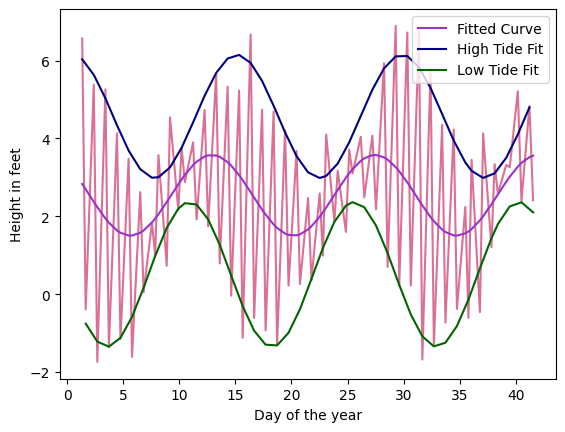

In [25]:
#Plot the data including the low and high fits
plt.plot(day,height, color= 'palevioletred')
plt.xlabel("Day of the year")
plt.ylabel("Height in feet")
plt.plot(day, y_fit, label = 'Fitted Curve', color = 'darkorchid')
plt.plot(high_days, high_fit, label = 'High Tide Fit', color = 'navy')
plt.plot(low_days, low_fit, label = 'Low Tide Fit', color = 'darkgreen')
plt.legend()
plt.show()

Step 3

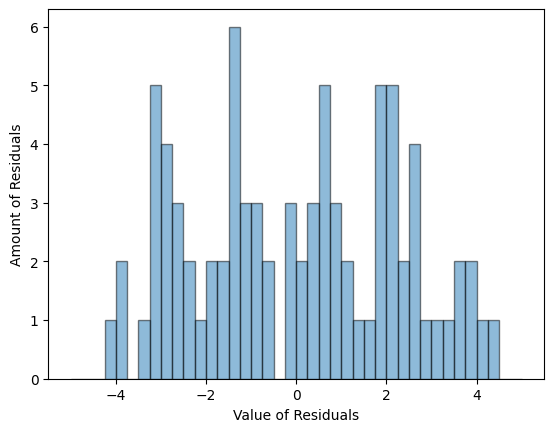

In [27]:
#Difference between fitted line and data
residuals = height - y_fit

#82 entries of data for 42 days
n = 82

x = residuals

width = 0.25
histmin = np.floor(min(x))
histmax = np.ceil(max(x)) + width

bins = np.arange(histmin, histmax, width)
plt.hist(x, bins=bins, alpha=0.5, edgecolor='black')
plt.xlabel("Value of Residuals")
plt.ylabel("Amount of Residuals")
plt.savefig("redsiduals_histogram", bbox_inches="tight", facecolor="white")

In [26]:
#Standard Deviation
def std():
    return np.std(x)

mean = np.mean(x)

print(f"The standard deviation is {std()}")

The standard deviation is 2.2638041604799537


Step 4

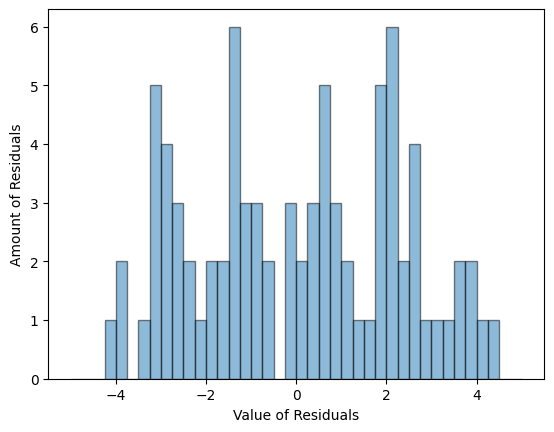

In [28]:
#Include tsunami outlier
x = np.append(x, 2)

plt.hist(x, bins=bins, alpha=0.5, edgecolor='black')
plt.xlabel("Value of Residuals")
plt.ylabel("Amount of Residuals")
plt.savefig("redsiduals_histogram", bbox_inches="tight", facecolor="white")

In [21]:
z_score = (2 - mean) / std()

print(f'The tsunami is {z_score} standard deviations away from the mean.')

The tsunami is 0.8821557076433477 standard deviations away from the mean.
